In [30]:
pip install scikit-learn


In [31]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset (1).csv


In [32]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()


,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt



In [34]:

# Step 2: Display basic info
print("\nName:", list(df.Name))
print("\n First few rows of the dataset:")
print(df.head())




Name: ['India Gate', "Humayun's Tomb", 'Akshardham Temple', 'Waste to Wonder Park', 'Jantar Mantar', 'Chandni Chowk', 'Lotus Temple', 'Red Fort', 'Agrasen ki Baoli', 'Sunder Nursery', 'Garden of Five Senses', 'Lodhi Garden', 'National Gallery of Modern Art', 'National Zoological Park ', 'Qutub Minar', 'National Science Centre', 'Marine Drive', 'Gateway of India', 'Chhatrapati Shivaji Maharaj Vastu Sangrahalaya', 'Sanjay Gandhi National Park', 'Siddhivinayak Temple', 'Mahalaxmi Temple', 'Haji Ali Dargah', 'Chowpatty Beach', 'Essel World', 'Elephanta Caves', 'Imagicaa', 'Bangalore Palace', 'Lalbagh Botanical Garden', 'Cubbon Park', 'Vidhana Soudha', 'ISKCON Temple Bangalore', 'Charminar', 'Golconda Fort', 'Hussain Sagar Lake', 'Ramoji Film City', 'Salar Jung Museum', 'Qutb Shahi Tombs', 'Birla Mandir', 'Chowmahalla Palace', 'Nehru Zoological Park', 'Lumbini Park', 'Victoria Memorial', 'Howrah Bridge', 'Indian Museum', 'Dakshineswar Kali Temple', 'Kalighat Kali Temple', 'Eden Gardens', '

In [35]:
# Step 3: choosen features and target
features = ['Zone', 'State', 'Type', 'Establishment Year', 'time needed to visit in hrs',
            'Google review rating', 'Entrance Fee in INR', 'Airport with 50km Radius',
            'Weekly Off', 'Significance', 'Number of google review in lakhs', 'Best Time to visit']
features = [f.strip() for f in features]
target = 'DSLR Allowed'




In [36]:
#  Step 4: prepare data Train/Test split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode all object (text) columns
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column].astype(str))
        label_encoders[column] = le

# Also encode target if it's categorical
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y.astype(str))


<ipython-input-37-bc60051ebed4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))
<ipython-input-37-bc60051ebed4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))
<ipython-input-37-bc60051ebed4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

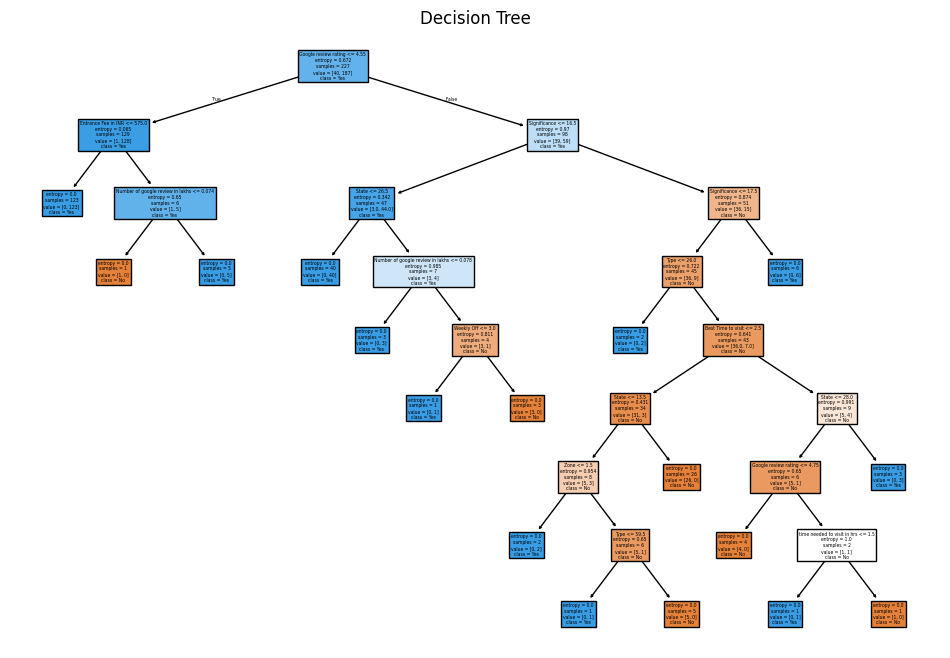

In [41]:
#Step 8: Tree
plt.figure(figsize=(12, 8))

tree.plot_tree(clf,
               filled=True,
               feature_names=features,
               class_names=le_target.classes_)  # <- FIXED
plt.title("Decision Tree")
plt.show()



In [39]:
# --- Step 6: Train Decision Tree ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)




DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
#  Step 7: Evaluate Model
y_pred = clf.predict(X_test)
print("\n🎯 Model Accuracy:", accuracy_score(y_test, y_pred))




🎯 Model Accuracy: 0.9387755102040817
